Título: Voronoi Binning

Data: 23/03/2020
    
Obj: Aplicar o algoritmo de Voronoi para aumentar a razão sinal/ruído em spaxes que possam ser aglotinados. Baseado no código de Michele Cappellari: The Voronoi binning method (VorBin) disponível em: https://www-astro.physics.ox.ac.uk/~mxc/software/#binning e descrito em https://ui.adsabs.harvard.edu/abs/2003MNRAS.342..345C

Autor: Carlos Roberto

In [1]:
from os import path
import numpy as np
import matplotlib.pyplot as plt

import vorbin
from vorbin.voronoi_2d_binning import voronoi_2d_binning

data_folder = "/home/carlos/Desktop/pPXF(SDP)/Final/"

Bin-accretion...
1  /  29
2  /  29
3  /  29
4  /  29
5  /  29
6  /  29
7  /  29
8  /  29
9  /  29
10  /  29
11  /  29
12  /  29
13  /  29
14  /  29
15  /  29
16  /  29
17  /  29
18  /  29
19  /  29
20  /  29
21  /  29
22  /  29
23  /  29
24  /  29
25  /  29
26  /  29
27  /  29
28  /  29
29  /  29
30  /  29
30  initial bins.
Reassign bad bins...
28  good bins.
Unbinned pixels:  2  /  290
Fractional S/N scatter (%): 15.782535433149608
Elapsed time accretion: 0.06 seconds
Elapsed time optimization: 0.00 seconds


"\nplt.subplot(211)\nplt.xlabel('R(px)')\nplt.ylabel('R(px)')\nplt.subplot(212)\nplt.xlabel('R(px)')\n"

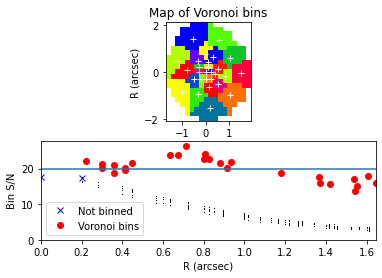

In [13]:
#y: é a posição y de onde foi extraído o sinal e o ruído
#x: é a posição x de onde foi extraído o sinal e o ruído
#signal: é o sinal do spaxel (y,x)
#noise: é o ruído do spaxel (y,x)

y, x, signal, noise = np.loadtxt("GoodPixels.txt").T #Lê a saída do código SNR
targetSN = 20 #Threshold pretendido

    # Perform the actual computation. The vectors
    # (binNum, xNode, yNode, xBar, yBar, sn, nPixels, scale)
    # are all generated in *output*
    #
binNum, xNode, yNode, xBar, yBar, sn, nPixels, scale = voronoi_2d_binning((x-29)*0.2, (y-29)*0.2, signal, 
                                                                          noise, targetSN, plot=1, quiet=0,
                                                                         wvt=False,cvt=False)

    # Save to a text file the initial coordinates of each pixel together
    # with the corresponding bin number computed by this procedure.
    # binNum uniquely specifies the bins and for this reason it is the only
    # number required for any subsequent calculation on the bins.
    #
np.savetxt('Voronoi_OutPut.txt', np.column_stack([y, x, binNum]),header="y_px \t x_px \t Vorbin_Id", fmt=b'%10.6f %10.6f %8i')
"""
plt.subplot(211)
plt.xlabel('R(px)')
plt.ylabel('R(px)')
plt.subplot(212)
plt.xlabel('R(px)')
"""
#plt.savefig(data_folder+'Data/Voronoi20/Vorbin.png', format='png')

#Essas são as novas posições dos spaxels binnados

#print(xBar)
#print(yBar)

In [10]:
(xNode)

array([ 0.        ,  0.        , -0.2       , -0.3       , -0.5       ,
       -0.32      ,  0.13333333, -1.02      , -0.8       , -1.22857143,
       -0.3       , -0.33333333, -0.55151515,  0.1       , -0.05      ,
        0.1       ,  0.2       ,  0.2       ,  0.4       ,  0.32      ,
        0.53333333,  0.5       ,  0.18285714,  1.03478261,  0.8       ,
        1.03333333,  1.48275862,  0.57647059])

In [11]:
(yNode)

array([ 0.        , -0.3       , -0.3       ,  0.        , -0.3       ,
       -0.96      , -0.66666667, -0.86      ,  0.05714286,  0.45714286,
        0.2       ,  0.46666667,  1.38787879,  0.2       ,  0.75      ,
        0.4       ,  0.        , -0.3       , -0.1       ,  0.64      ,
        0.13333333, -0.5       , -1.55428571, -0.9826087 , -0.2       ,
        0.56666667, -0.05517241,  1.34117647])